In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_49422_G')

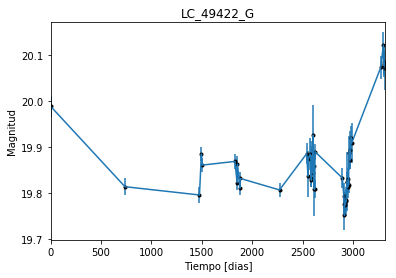

In [2]:
data = np.genfromtxt('LC_49422_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_49422_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

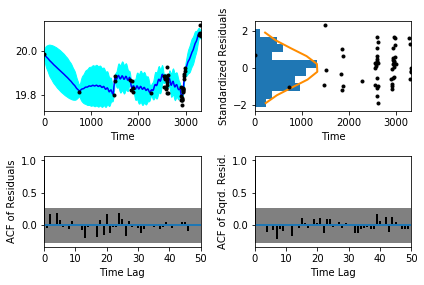

In [5]:
sample.assess_fit()

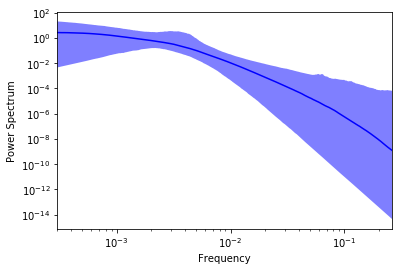

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_49422_G')

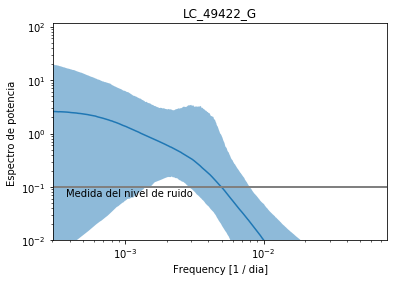

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_49422_G')

Text(0.5,1,'Prediccion , valor esperado LC_49422_G')

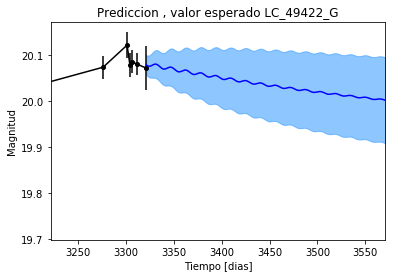

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_49422_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_ 49422_G')

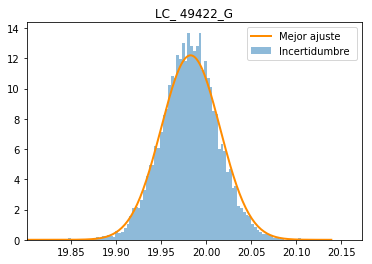

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_ 49422_G')

Text(0.5,1,'Interpolacion, camino simulado LC_49422_G')

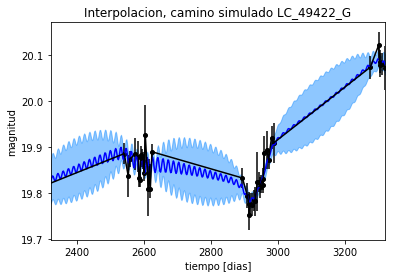

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_49422_G')

Text(0.5,1,'Interpolacion, camino simulado LC_49422_G')

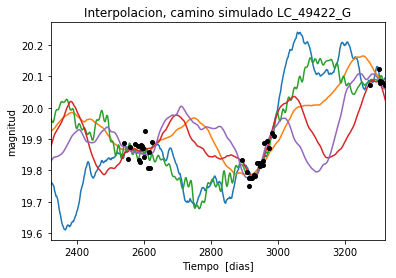

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_49422_G')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1059.35599792
Median: 0.00667849869106
Standard deviation: 0.0966536931625
68% credibility interval: [ 0.00075397  0.09985658]
95% credibility interval: [  3.36698214e-04   3.84815123e-01]
99% credibility interval: [  3.07712331e-04   4.82119373e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 536.648968731
Median: 0.00268313718418
Standard deviation: 0.055043703274
68% credibility interval: [ 0.00057107  0.03079063]
95% credibility interval: [ 0.00032909  0.19935775]
99% credibility interval: [  3.06986083e-04   3.49216210e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 491.757148635
Median: 0.0162190860303
Standard

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1165.03244985
Median: 117.786018854
Standard deviation: 1.73286060106
68% credibility interval: [ 115.89387222  119.05063794]
95% credibility interval: [ 113.3088828   120.19108099]
99% credibility interval: [ 111.2530585   120.80871318]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 357.698384179
Median: 0.450552025315
Standard deviation: 1.2004744671
68% credibility interval: [ 0.04961346  2.13555024]
95% credibility interval: [ 0.01641757  4.19328214]
99% credibility interval: [ 0.01128918  5.86558519]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 372.295338376
Median: 0.251563726216
Standard deviation: 2.74878952384
68% credibility interval: [ 0.01021363  3.45372313]
95% credibility interval: [  1.10470469e-03

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 475.690316612
Median: 7.950287763e-20
Standard deviation: 5.18219430862e+74
68% credibility interval: [  1.10562549e-79   2.01233766e+14]
95% credibility interval: [  4.71273465e-135   5.35933806e+054]
99% credibility interval: [  3.39726072e-145   4.45244641e+074]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2787.49811809
Median: 19.8889767633
Standard deviation: 0.0460561772976
68% credibility interval: [ 19.85410781  19.93072342]
95% credibility interval: [ 19.80415477  19.9931516 ]
99% credibility interval: [ 19.75716104  20.04730689]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 456.422106997
Median: 0.023849197627
Standard deviation: 0.133059196417
68% credibility interval: [ 0.          0.24241812]
95% credibility interval: [ 0.          0.45163657]
99% credibility interval: [ 0.          0.50507077]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 456.422106997
Median: 0.023849197627
Standard deviation: 0.133059196417
68% credibility interval: [ 0.          0.24241812]
95% credibility interval: [ 0.          0.45163657]
99% credibility interval: [ 0.          0.50507077]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 267.625175429
Median: 0.0
Standard deviation: 0.00124020907377
68% credi

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1165.03244985
Median: 117.786018854
Standard deviation: 1.73286060106
68% credibility interval: [ 115.89387222  119.05063794]
95% credibility interval: [ 113.3088828   120.19108099]
99% credibility interval: [ 111.2530585   120.80871318]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2085.764945
Median: 0.0105460587646
Standard deviation: 0.0111576436469
68% credibility interval: [ 0.00650009  0.01896103]
95% credibility interval: [ 0.00430901  0.0391147 ]
99% credibility interval: [ 0.00357068  0.0681808 ]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1279.57744462
Median: 1.0253953447
Standard deviation: 0.177641746192
68% credibility interval: [ 0.87612497  1.21727531]
95% credibility interval: [ 0.7397727   1.43793165]
99% credibility interval: [ 0.66795732  1.61429881]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 516.520116395
Median: 7.94588458291e-05
Standard deviation: 0.0188166829918
68% credibility interval: [  1.35148135e-17   2.84360501e-03]
95% credibility interval: [  6.13575433e-60   4.74495839e-02]
99% credibility interval: [  8.32347149e-80   1.29292590e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1059.35599792
Median: (-0.0419622448497-0.0606593692499j)
Standard deviation: 1.03332491055
68% credibility interval: [-0.62741742-0.91049924j -0.00473735-0.06157888j]
95% credibility interval: [ -2.41786472e+00-2.79189816j  -2.11553727e-03-0.01763572j]
99% credibility interval: [ -3.02924536e+00+0.j          -1.93341360e-03-2.00563847j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 536.648968731
Median: (-0.0168586481328+0.0481742015712j)
Standard deviation: 0.904747246407
68% credibility interval: [-0.19346322+0.83351315j -0.00358812+0.74357408j]
95% credibility interval: [-1.25260168+1.97896502j -0.00206774+0.02443945j]
99% credibility interval: [ -2.19419016e+00+2.89972324j  -1.92885045e-03+0.02590227j]
Posterior